# Prova P2 - TTI109 - Estatística (CIC-SIN)
## Instruções Gerais


*   Preencha corretamente os campos de identificação (nome completo e RA).
*   Execute a célula de código que contém tais campos.
*   É permitida a consulta ao material da disciplina (OPEN-LMS).
*   É permitida a consulta ao GitHub pessoal.
*   A prova consta de 7 questões. As 6 primeiras tem pontuação  máxima de 1,6 pontos. *Dessas questões, a de menor pontuação será descartada*. A questão 7 tem pontuação máxima de 2,0 pontos, totalizando 10,0 pontos.
*   Nas questões, grande parte do código já é fornecida. Preencha as lacunas ***'''Seu código aqui'''*** com sua solução.
*   Quando pertinente, responda às questões dissertativas nos campos a elas destinados (Não use acentuação!).
*   Execute a célula de código que contém esses campos.

## Instruções para uso das funções de teste de hipótese

*   Faça o *upload* do arquivo *funcoes_estatisticas.py* para o ambiente Colab.
*   A importação do arquivo está implementada na seção de código localizada após a célula "Identificação".
*   Para chamar as funções, use a sintaxe *fest.nome_funcao()*.



In [25]:
#@title Identificação
Nome = "Fernando Freitas de Oliveira" #@param {type:"string"}
RA = "19.00468-0" #@param {type:"string"}


In [26]:
# Importação de módulos
import funcoes_estatisticas as fest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Questão 01 - Níveis de dióxido de nitrogênio

(1,6 pts.) Um cientista estima que o nível médio de dióxido de nitrogênio em Calgary é maior que 32 partes por bilhão. Você quer testar essa estimativa. Para isso, você determina os níveis de dióxido de nitrogênio em 34 dias selecionados aleatoriamente. Os resultados (em partes por bilhão) estão listados na tabela a seguir.

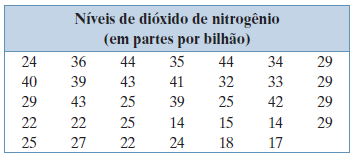

Suponha que o desvio padrão populacional é de 9 partes por bilhão. Para o nível de significância $\alpha = 0,06$, você pode concordar com a estimativa do cientista? (Adaptado de *Clean Air Strategic Alliance*)

In [27]:
# Conjunto de dados - Pandas Series
NO2 = pd.Series([24, 36, 44, 35, 44, 34, 29, 40, 39, 43, 41, 32, 33, 29,
                 29, 43, 25, 39, 25, 42, 29, 22, 22, 25, 14, 15, 14, 29,
                 25, 27, 22, 24, 18, 17])
media = NO2.mean()
'''Escreva as hipóteses nula e alternativa, indicando a afirmação.'''
# H0: mu <= 32 partes por bilhão
# Ha: mu > 32 partes por bilhão (afirmação)
p_valor = fest.teste_z(est_amostral=media, n_amostras=34, alpha=0.06, mu=32,
            sigma=9, teste='dir')

*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à direita com p-valor = 0.933886
Hipótese nula NÃO rejeitada ao nível de significância 6.0%


In [28]:
#@title Interpretação
Int_Q1 = "Podemos concluir que, de acordo com essa amostra de dados, a estimativa do cientista estava errada e o nivel medio de N02 em Calgary e menor ou igual a 32 partes por bilhao" #@param {type:"string"}

## Questão 02 - Salários anuais

(1,6 pts.) Uma agência de empregos afirma que o salário médio anual para trabalhadoras de período integral, mulheres, maiores de 25 anos e sem diploma no ensino médio é no máximo US$\$$ 18.500. Os salários anuais (em dólares) para uma amostra aleatória de 12 trabalhadoras de período integral, mulheres e sem diploma de ensino médio estão listados na tabela a seguir.

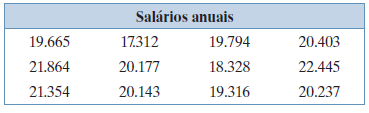

Considerando o nível de significância $\alpha = 0,10$, há evidência suficiente para concordar com a afirmação da agência? (Adaptado de *U.S. Bureau of Labor Statistics*)

In [29]:
# Conjunto de dados - Pandas Series
salarios = pd.Series([19665, 17312, 19794, 20403,
                      21864, 20177, 18328, 22445,
                      21354, 20143, 19316, 20237])
media = salarios.mean()
desv_pad = salarios.std()
'''Escreva as hipóteses nula e alternativa, indicando a afirmação.'''
# H0: mu <= 18500 (afirmação)
# Ha: mu > 18500
p_valor = fest.teste_t(est_amostral=media, n_amostras=12, alpha=0.10,
            mu=18500, s_amostral=desv_pad, teste='dir')


*** Teste de hipótese para a média (sigma desconhecido) ***
Teste unilateral à direita com t0 = 1.363430
Hipótese nula rejeitada ao nível de significância 10.0%


In [30]:
#@title Interpretação
Int_Q2 = "Podemos concluir que, de acordo com essa amostra afirmacao da agencia de empregos esta errada, o salario medio para mulheres, com menos de 25 anos e sem ensio medio e maior que 18500 dolares" #@param {type:"string"}

## Questão 03 - Tempo de espera em um hospital

(1,6 pts) O porta-voz de um hospital afirma que o desvio padrão dos tempos de espera dos pacientes no departamento de emergência é não mais que 0,5 minuto. Uma amostra aleatória de 25 tempos de espera tem um desvio padrão de 0,7 minuto. Para o nível de significância $\alpha = 0,10$, há evidência suficiente para rejeitar a afirmação do porta-voz?

In [31]:
'''Escreva as hipóteses nula e alternativa, indicando a afirmação.'''
# H0: sigma <= 0.5 (afirmação)
# Ha: sigma > 0.5
p_valor = fest.teste_chi2(est_amostral=0.7, pop=0.5, n_amostras=25, alpha=0.10,
               teste='dir', parametro='pad')

*** Teste de hipótese para desvio padrão ***
Teste unilateral à direita com:
Estatística de teste padronizada = 47.0400
Valor chi-quadrado crítico = 33.1962
Hipótese nula rejeitada ao nível de significância 10.0%


In [32]:
#@title Interpretação
Int_Q3 = "Podemos concluir que, com essa amostra, a afirmacao do porta-voz do hospital esta errada, o desvio padrao dos tempos de espera dos pacientes na emergencia e maior que 0.5 minuto" #@param {type:"string"}

## Questão 04 - Pontuação no ACT

(1,6 pts.) Um orientador afirma que estudantes do ensino médio em um programa preparatório para faculdade têm maior pontuação no ACT que aqueles em um programa geral.

*   A pontuação média no ACT para 49 estudantes do ensino médio que estão em um programa preparatório para faculdade é 22,2, com desvio padrão populacional histórico de 4,8.
*   A pontuação média no ACT para 44 estudantes do ensino médio que estão em um programa geral é 20,0, com desvio padrão populacional histórico de 5,4.

Para $\alpha=0,10$, você pode confirmar a afirmação do orientador? (Adaptado de *ACT, Inc.*)

In [33]:
'''Escreva as hipóteses nula e alternativa, indicando a afirmação.'''
# H0: mu_prep <= mu_geral
# Ha: mu_prep > mu_geral (afirmação)
zpad,z0 = fest.teste_z2(xbarra_1=22.2, sig_1=4.8, n_1=49,
                        xbarra_2=20.0, sig_2=5.4, n_2=44,
                        alpha=0.10, teste='dir')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste unilateral à direita com z_padrão = 2.066907 e z0 = 1.281552
Hipótese nula rejeitada ao nível de significância 10.0%


In [34]:
#@title Interpretação
Int_Q4 = "Podemos concluir, com essas amostras, que a afirmacao do orientador esta correta, estudantes com programa preparaorio tem maior pontuacao no ACT que aqueles em um programa geral" #@param {type:"string"}

## Questão 05 - Resistência à tração

(1,6 pts.) A resistência à tração de um metal é uma medida de sua capacidade para resistir à deformação quando puxado longitudinalmente. Um novo tipo de tratamento experimental produziu barras de aço com as resistências à tração (em newtons
por milímetro quadrado [$N/mm^2$]) listadas a seguir:

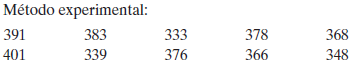

O método antigo produzia barras de aço com as resistências à tração (em $N/mm^2$) listadas a seguir.

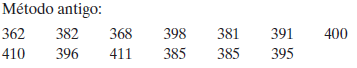

Para $\alpha = 0,01$, você pode concordar com a afirmação de que o novo tratamento faz diferença na resistência à tração das barras de aço? Suponha que as variâncias populacionais são iguais.

In [35]:
# Conjunto de dados - Pandas Series
exp = pd.Series([391, 383, 333, 378, 368, 401, 339, 376, 366, 348])
antigo = pd.Series([362, 382, 368, 398, 381, 391, 400, 410, 396, 411, 385, 385, 395])
media_exp = exp.mean()
des_pad_exp = exp.std()
media_antigo = antigo.mean()
des_pad_antigo = antigo.std()
'''Escreva as hipóteses nula e alternativa, indicando a afirmação.'''
# H0: mu_exp = mu_antigo
# Ha: mu_exp != mu_antigo (afirmação)
zpad, z0 = fest.teste_t2(xbarra_1=media_exp, s_1=des_pad_exp, n_1=10,
                         xbarra_2=media_antigo, s_2=des_pad_antigo, n_2=10,
                         alpha=0.01, var='!=', teste='bilateral')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais desconhecidos
-> Teste bilateral com t_padrão = -2.524194, t01 = -3.249836 e t02 = 3.249836
Hipótese nula NÃO rejeitada ao nível de significância 1.0%


In [36]:
#@title Interpretação
Int_Q5 = "Podemos concluir, com essas amostras, que o novo tratamento nao faz diferenca na resistencia da tracao das barras de aco" #@param {type:"string"}

## Questão 06 - Pneumonia

(1,6 pts.) Um cientista afirma que pneumonia causa perda de peso em ratos. A tabela a seguir mostra os pesos (em gramas) de seis ratos antes e dois dias após a infecção.

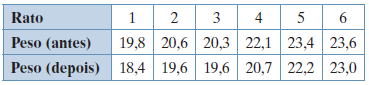

Para $\alpha = 0,01$, há evidência suficiente para concordar com a afirmação do cientista? (Adaptado de *U.S. National Library of Medicine*)

In [37]:
from scipy import stats as st
# Conjunto de dados - Pandas DataFrames
ratos = pd.DataFrame({'Antes': [19.8, 20.6, 20.3, 22.1, 23.4, 23.6],
                      'Depois': [18.4, 19.6, 19.6, 20.7, 22.2, 23.0]})
''' Escreva a variável de desvio adotada'''
# d = (peso antes da pneumonia) - (peso depois da pneumonia)
'''Escreva as hipóteses nula e alternativa, indicando a afirmação.'''
# H0: mu_d <= 0
# Ha: mu_d > 0 (afirmação)
tpadrao, p_valor = st.ttest_rel(a=ratos['Antes'], b=ratos['Depois'],
                                alternative='greater')
print('*** Teste de amostras emparelhadas ***')
alpha = 0.01
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância de {alpha*100:.2f}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância de {alpha*100:.2f}%')

*** Teste de amostras emparelhadas ***
Hipótese nula rejeitada ao nível de significância de 1.00%


In [38]:
#@title Interpretação
Int_Q6 = "Podemos concluir, com essas amostras, que a afirmacao do cientista esta correta, ha perda de peso nos ratos apos a pneumonia" #@param {type:"string"}

## Questão 07 - Idade e horas de sono

As idades (em anos) de 10 crianças e a quantidade diária de horas de sono de cada uma delas são registradas a seguir:

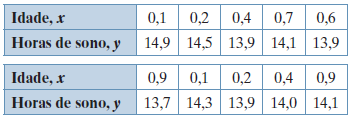

**a)** (0,5 pt.) Construa o diagrama de dispersão dos dados e descreva o tipo de correlação existente.

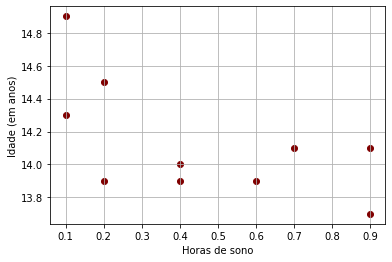

In [39]:
# Dados
idade = pd.Series([0.1, 0.2, 0.4, 0.7, 0.6, 0.9, 0.1, 0.2, 0.4, 0.9])
horas_sono = pd.Series([14.9, 14.5, 13.9, 14.1, 13.9, 13.7, 14.3, 13.9, 14.0, 14.1])
# Diagrama de dispersão
plt.scatter(idade, horas_sono, c='maroon')
plt.xlabel('Horas de sono')
plt.ylabel('Idade (em anos)')
plt.grid()

In [40]:
#@title Análise
parecer = "Correlacao linear negativa" #@param [" --- ", "Nao ha correlacao", "Correlacao linear positiva ", "Correlacao linear negativa", "Correlacao nao-linear"]

**b)** (0,5 pt.) Calcule o coeficiente de correlação.

In [41]:
# Cálculo do coeficiente de correlação
r, p_valor = st.pearsonr(idade, horas_sono)
# Exibição do valor
print(f'Coeficiente de correlação = {r:.3f}')

Coeficiente de correlação = -0.604


**c)** (0,5 pt.) Determine a equação da reta de regressão linear.

In [42]:
# Criação do objeto regressão linear 
regressao_sono = LinearRegression()
# Cálculo da reta de regressão
regressao_sono.fit(np.array(idade).reshape(-1,1), np.array(horas_sono).reshape(-1,1) )
# Exibição dos coeficientes da reta
inclinacao = regressao_sono.coef_[0][0]
intercepto = regressao_sono.intercept_[0]
print(f'Reta de regressão: y = {inclinacao:.3f}x + {intercepto:.3f}')

Reta de regressão: y = -0.688x + 14.440


**d)** (0,5 pt.) Quantas horas de sono diárias são esperadas para crianças de 0,3, 0,8 e 1,2 anos?

In [44]:
# Previsões desejadas
idades_desejadas =  np.array([0.3, 0.8, 1.2]).reshape(-1,1)
sono_previsto =  regressao_sono.predict(idades_desejadas)
print('*** Horas de sono previstas ***')
for prev in range(len(sono_previsto)):
  print(f'{idades_desejadas[prev][0]} anos --> {sono_previsto[prev][0]:.2f} horas de sono')

*** Horas de sono previstas ***
0.3 anos --> 14.23 horas de sono
0.8 anos --> 13.89 horas de sono
1.2 anos --> 13.61 horas de sono
